<a href="https://colab.research.google.com/github/geoifg/SMS/blob/main/Reg_log_AD_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sobrevivência no Titanic - Conversão Python

Este notebook é uma conversão do script R original para análise do dataset Titanic, utilizando bibliotecas Python como Pandas, NumPy e Scikit-learn.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn.ensemble import RandomForestClassifier # Exemplo de outro modelo possível

# Configurações de visualização
# %matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50) # Mostrar mais colunas do dataframe

print("Bibliotecas importadas.")

Bibliotecas importadas.


## 1. Carregar Dados

Importar o dataset a partir da URL.

Variáveis Categóricas: Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp, and Parch.
Variáveis Numéricas: Fare, Age, and PassengerId.

In [2]:
# importar dados csv
dataset_url = "https://raw.githubusercontent.com/geoifg/SMS/main/titanic.csv"
# Especificar separador e decimal corretamente
dataset = pd.read_csv(dataset_url, sep=';', decimal='.')

print("Dataset carregado com sucesso.")

Dataset carregado com sucesso.


## 2. Exploração Inicial dos Dados

Verificar as primeiras linhas, nomes das colunas, estatísticas descritivas e tipos de dados.

In [3]:
# Verificar as primeiras observações (linhas)
print("Primeiras 5 linhas:")
display(dataset.head())

# Nomes das colunas
print("\nNomes das colunas:")
print(dataset.columns.tolist())

# Estatística descritiva do dataframe
print("\nEstatística Descritiva:")
# Include 'all' para incluir colunas categóricas e numéricas
display(dataset.describe(include='all'))

# Verificar a estrutura do dado (tipos e non-null counts)
print("\nInformações do DataFrame (Tipos e Nulos):")
dataset.info()

Primeiras 5 linhas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S



Nomes das colunas:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Estatística Descritiva:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,247,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,8.05,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,43,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,NaN,NaN,NaN



Informações do DataFrame (Tipos e Nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


## 3. Pré-processamento Inicial

- Converter `Survived` para categórica (Yes/No).
- Converter `Fare` para numérica (assegurar tipo).
- Mapear `Embarked` para nomes completos e converter para categórica.
- Remover colunas não informativas (`PassengerId`, `Name`, `Ticket`, `Cabin`).
- Converter outras colunas relevantes (`Pclass`, `Sex`, `SibSp`, `Parch`) para categóricas.

In [4]:
# Convertendo a coluna "Survived" para categórica (Yes/No)
# Usar numpy.where ou map
dataset['Survived'] = np.where(dataset['Survived']==1, "Yes", "No")
dataset['Survived'] = dataset['Survived'].astype('category')
print("Coluna 'Survived' convertida:")
display(dataset[['Survived']].head())

# Convertendo a coluna "Fare" para numerica (garantir o tipo e tratar erros)
dataset['Fare'] = pd.to_numeric(dataset['Fare'], errors='coerce')
print("\nColuna 'Fare' convertida para numérica (erros viram NaN).")

# Dando um indicador claro do local do embarque
embark_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
dataset['Embarked'] = dataset['Embarked'].map(embark_map)
dataset['Embarked'] = dataset['Embarked'].astype('category')
print("\nColuna 'Embarked' mapeada e convertida:")
display(dataset[['Embarked']].head())
print("Valores únicos em 'Embarked':", dataset['Embarked'].unique())

# Excluindo as colunas "PassengerId", "Name", "Ticket" e "Cabin"
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
dataset.drop(columns=columns_to_drop, inplace=True)
print(f"\nColunas {columns_to_drop} removidas.")

# Alterando colunas para tipo 'category'
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch']
for col in categorical_cols:
    # Pclass é ordinal, mas trataremos como categórica aqui. Converter para str primeiro evita problemas.
    if col == 'Pclass':
        dataset[col] = dataset[col].astype(str)
    dataset[col] = dataset[col].astype('category')
print(f"\nColunas {categorical_cols} convertidas para 'category'.")

# Verificar estrutura após conversões
print("\nInformações atualizadas do DataFrame:")
dataset.info()

# Número de linhas atual
print("\nNúmero de linhas:", len(dataset))

# Conferir estatística descritiva novamente
print("\nEstatística Descritiva Atualizada:")
display(dataset.describe(include='all'))

Coluna 'Survived' convertida:


,Survived
0,No
1,Yes
2,Yes
3,Yes
4,No



Coluna 'Fare' convertida para numérica (erros viram NaN).

Coluna 'Embarked' mapeada e convertida:


,Embarked
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton


Valores únicos em 'Embarked': ['Southampton', 'Cherbourg', 'Queenstown', NaN]
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

Colunas ['PassengerId', 'Name', 'Ticket', 'Cabin'] removidas.

Colunas ['Pclass', 'Sex', 'SibSp', 'Parch'] convertidas para 'category'.

Informações atualizadas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      868 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 20.5 KB

Número de linhas: 891

Estatística Descritiva Atualizada:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891,891,891,714.000000,891.0,891.0,868.000000,889
unique,2,3,2,NaN,7.0,7.0,NaN,3
top,No,3,male,NaN,0.0,0.0,NaN,Southampton
freq,549,491,577,NaN,608.0,678.0,NaN,644
mean,NaN,NaN,NaN,29.699118,NaN,NaN,91.288425,NaN
std,NaN,NaN,NaN,14.526497,NaN,NaN,159.991488,NaN
min,NaN,NaN,NaN,0.420000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,20.125000,NaN,NaN,10.500000,NaN
50%,NaN,NaN,NaN,28.000000,NaN,NaN,27.825000,NaN
75%,NaN,NaN,NaN,38.000000,NaN,NaN,78.958000,NaN


## 4. Tratamento de Valores Ausentes (NA)

- Identificar colunas com valores ausentes.
- Imputar a mediana para a coluna `Age`.
- Remover linhas com valores ausentes restantes (principalmente em `Embarked` e `Fare` após conversão).

In [5]:
# Verificar valores ausentes
print("Valores ausentes por coluna (antes do tratamento):")
print(dataset.isnull().sum())

# Imputar 'Age' com a mediana
# Na R: dataset$Age[is.na(dataset$Age)] <- round(median(dataset$Age, na.rm = TRUE))
age_median = dataset['Age'].median()
dataset['Age'].fillna(age_median, inplace=True)
print(f"\nValores ausentes em 'Age' preenchidos com a mediana: {age_median:.2f}")

# Verificar novamente valores ausentes (após imputar Age)
print("\nValores ausentes após imputação de 'Age':")
print(dataset.isnull().sum())

# Remover linhas com NA restantes (equivalente a na.omit ou complete.cases)
# R: dataset_sem_na <- na.omit(dataset) OU subset(dataset, complete.cases(Fare))
dataset_sem_na = dataset.dropna().copy() # Usar copy() para evitar SettingWithCopyWarning
print(f"\nLinhas com valores NA removidas. Shape atual: {dataset_sem_na.shape}")

# Verificar NAs finais
print("\nValores ausentes finais:")
print(dataset_sem_na.isnull().sum())

# Conferir estatísticas após limpeza
print("\nEstatística Descritiva (após limpeza):")
display(dataset_sem_na.describe(include='all'))

# Conferir info após limpeza
print("\nInformações do DataFrame (após limpeza):")
dataset_sem_na.info()

Valores ausentes por coluna (antes do tratamento):
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         23
Embarked      2
dtype: int64

Valores ausentes em 'Age' preenchidos com a mediana: 28.00

Valores ausentes após imputação de 'Age':
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare        23
Embarked     2
dtype: int64

Linhas com valores NA removidas. Shape atual: (866, 8)

Valores ausentes finais:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Estatística Descritiva (após limpeza):


<ipython-input-5-c1a5ad02cc6c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(age_median, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,866,866,866,866.000000,866.0,866.0,866.000000,866
unique,2,3,2,NaN,7.0,7.0,NaN,3
top,No,3,male,NaN,0.0,0.0,NaN,Southampton
freq,544,491,569,NaN,587.0,665.0,NaN,634
mean,NaN,NaN,NaN,29.148002,NaN,NaN,91.314495,NaN
std,NaN,NaN,NaN,12.986861,NaN,NaN,160.175420,NaN
min,NaN,NaN,NaN,0.420000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,22.000000,NaN,NaN,10.500000,NaN
50%,NaN,NaN,NaN,28.000000,NaN,NaN,27.750000,NaN
75%,NaN,NaN,NaN,35.000000,NaN,NaN,78.958000,NaN



Informações do DataFrame (após limpeza):
<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  866 non-null    category
 1   Pclass    866 non-null    category
 2   Sex       866 non-null    category
 3   Age       866 non-null    float64 
 4   SibSp     866 non-null    category
 5   Parch     866 non-null    category
 6   Fare      866 non-null    float64 
 7   Embarked  866 non-null    category
dtypes: category(6), float64(2)
memory usage: 26.6 KB


## 5. Divisão Treino/Teste e Pré-processamento Final

- Separar features (X) e variável alvo (y).
- Dividir os dados em conjuntos de treino (70%) e teste (30%), estratificando pela variável `Survived`.
- Criar e aplicar pré-processadores:
    - `StandardScaler` para features numéricas.
    - `OneHotEncoder` para features categóricas.

In [6]:
# Separar features (X) e target (y)
X = dataset_sem_na.drop('Survived', axis=1)
y = dataset_sem_na['Survived']

# Dividir em treino e teste (70/30 estratificado)
# R: set.seed(100); xvars <- createDataPartition(...)
seed = 100
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=seed, stratify=y
)

# Verificar shapes
print("Shape Treino X:", X_treino.shape)
print("Shape Teste X:", X_teste.shape)
print("Shape Treino y:", y_treino.shape)
print("Shape Teste y:", y_teste.shape)

# Identificar tipos de colunas para pré-processamento no conjunto de TREINO
numeric_features = X_treino.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_treino.select_dtypes(include='category').columns.tolist()

print("\nFeatures Numéricas:", numeric_features)
print("Features Categóricas:", categorical_features)

# Criar pipelines de pré-processamento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Padronizar features numéricas
])

categorical_transformer = Pipeline(steps=[
    # handle_unknown='ignore' para evitar erros se categorias no teste não existirem no treino
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinar transformers usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Manter outras colunas (se houver), embora não deva haver
)

# Aplicar pré-processamento (FIT no treino, TRANSFORM no treino e teste)
X_treino_proc = preprocessor.fit_transform(X_treino)
X_teste_proc = preprocessor.transform(X_teste)

# Obter nomes das features após one-hot encoding para interpretabilidade
try:
    # get_feature_names_out está disponível em versões mais recentes do scikit-learn
    feature_names_out = preprocessor.get_feature_names_out()
except AttributeError:
    # Fallback para versões mais antigas
    feature_names_out = []
    # Para numéricas
    feature_names_out.extend(numeric_features)
    # Para categóricas (one-hot)
    ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    feature_names_out.extend(ohe_feature_names)
    # Para remainder (se houver)
    # remainder_cols = [c for c in X_treino.columns if c not in numeric_features and c not in categorical_features]
    # feature_names_out.extend(remainder_cols)


# Converter para DataFrame (opcional, mas útil para visualização)
X_treino_proc_df = pd.DataFrame(X_treino_proc, columns=feature_names_out, index=X_treino.index)
X_teste_proc_df = pd.DataFrame(X_teste_proc, columns=feature_names_out, index=X_teste.index)

print("\nPré-processamento aplicado (StandardScaler + OneHotEncoder).")
print("Shape Treino X processado:", X_treino_proc.shape)
print("Shape Teste X processado:", X_teste_proc.shape)
print("\nPrimeiras linhas do Treino X processado:")
display(X_treino_proc_df.head())

Shape Treino X: (606, 7)
Shape Teste X: (260, 7)
Shape Treino y: (606,)
Shape Teste y: (260,)

Features Numéricas: ['Age', 'Fare']
Features Categóricas: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Pré-processamento aplicado (StandardScaler + OneHotEncoder).
Shape Treino X processado: (606, 24)
Shape Teste X processado: (260, 24)

Primeiras linhas do Treino X processado:


,num__Age,num__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__SibSp_0,cat__SibSp_1,cat__SibSp_2,cat__SibSp_3,cat__SibSp_4,cat__SibSp_5,cat__SibSp_8,cat__Parch_0,cat__Parch_1,cat__Parch_2,cat__Parch_3,cat__Parch_4,cat__Parch_5,cat__Parch_6,cat__Embarked_Cherbourg,cat__Embarked_Queenstown,cat__Embarked_Southampton
754,1.533350,-0.140831,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
583,0.577776,-0.304011,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
492,2.090768,-0.367151,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
336,0.020357,-0.130335,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
605,0.577776,-0.465223,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 6. Modelo Base: Regressão Logística (sem otimização)

Treinar um modelo de regressão logística simples e avaliar no conjunto de teste.

In [7]:
# Treinar modelo de Regressão Logística
# R: modelo_reglog <- glm(Survived ~ ., data = treinamento, family = binomial)
# solver='liblinear' é bom para datasets pequenos; max_iter pode precisar de ajuste
modelo_reglog_base = LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000)
modelo_reglog_base.fit(X_treino_proc, y_treino)

print("Modelo de Regressão Logística Base treinado.")

# Fazer previsões no conjunto de teste
# R: previsoes <- predict(modelo_reglog, teste, type="response") -> prob
# R: previsoes_classes <- ifelse(previsoes > 0.5, "Yes", "No") -> classes
previsoes_reglog_base = modelo_reglog_base.predict(X_teste_proc)
previsoes_proba_reglog_base = modelo_reglog_base.predict_proba(X_teste_proc)[:, 1] # Probabilidade da classe 'Yes'

# Avaliar o modelo
# R: reglog_tabela <- table(teste$Survived, teste$est_reglog); confusionMatrix(reglog_tabela)
print("\n--- Avaliação: Regressão Logística Base ---")
print("\nMatriz de Confusão:")
cm_reglog_base = confusion_matrix(y_teste, previsoes_reglog_base, labels=modelo_reglog_base.classes_)
# Display Confusion Matrix com labels para clareza
cm_reglog_base_df = pd.DataFrame(cm_reglog_base, index=modelo_reglog_base.classes_, columns=modelo_reglog_base.classes_)
print(cm_reglog_base_df)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes_reglog_base))

# Adicionar previsões ao DataFrame de teste original para comparação (como no R)
teste_df_results = X_teste.copy()
teste_df_results['Survived_Actual'] = y_teste
teste_df_results['est_reglog_base'] = previsoes_reglog_base
# teste_df_results['est_reglog_base_proba'] = previsoes_proba_reglog_base # Probabilidades se necessário
print("\nDataFrame de Teste com Previsões (RegLog Base):")
display(teste_df_results[['Survived_Actual', 'est_reglog_base']].head())

Modelo de Regressão Logística Base treinado.

--- Avaliação: Regressão Logística Base ---

Matriz de Confusão:
      No  Yes
No   144   19
Yes   28   69

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.84      0.88      0.86       163
         Yes       0.78      0.71      0.75        97

    accuracy                           0.82       260
   macro avg       0.81      0.80      0.80       260
weighted avg       0.82      0.82      0.82       260


DataFrame de Teste com Previsões (RegLog Base):


,Survived_Actual,est_reglog_base
158,No,No
345,Yes,Yes
174,No,No
427,Yes,Yes
621,Yes,No


## 7. Modelo Base: Árvore de Decisão (CART, sem otimização)

Treinar um modelo de árvore de decisão (algoritmo CART) e avaliar. Visualizar a árvore e a importância das variáveis.

Modelo de Árvore de Decisão Base (CART) treinado.

--- Avaliação: Árvore de Decisão Base (CART) ---

Matriz de Confusão:
      No  Yes
No   134   29
Yes   26   71

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.84      0.82      0.83       163
         Yes       0.71      0.73      0.72        97

    accuracy                           0.79       260
   macro avg       0.77      0.78      0.78       260
weighted avg       0.79      0.79      0.79       260


Plot da Árvore de Decisão (CART Base):


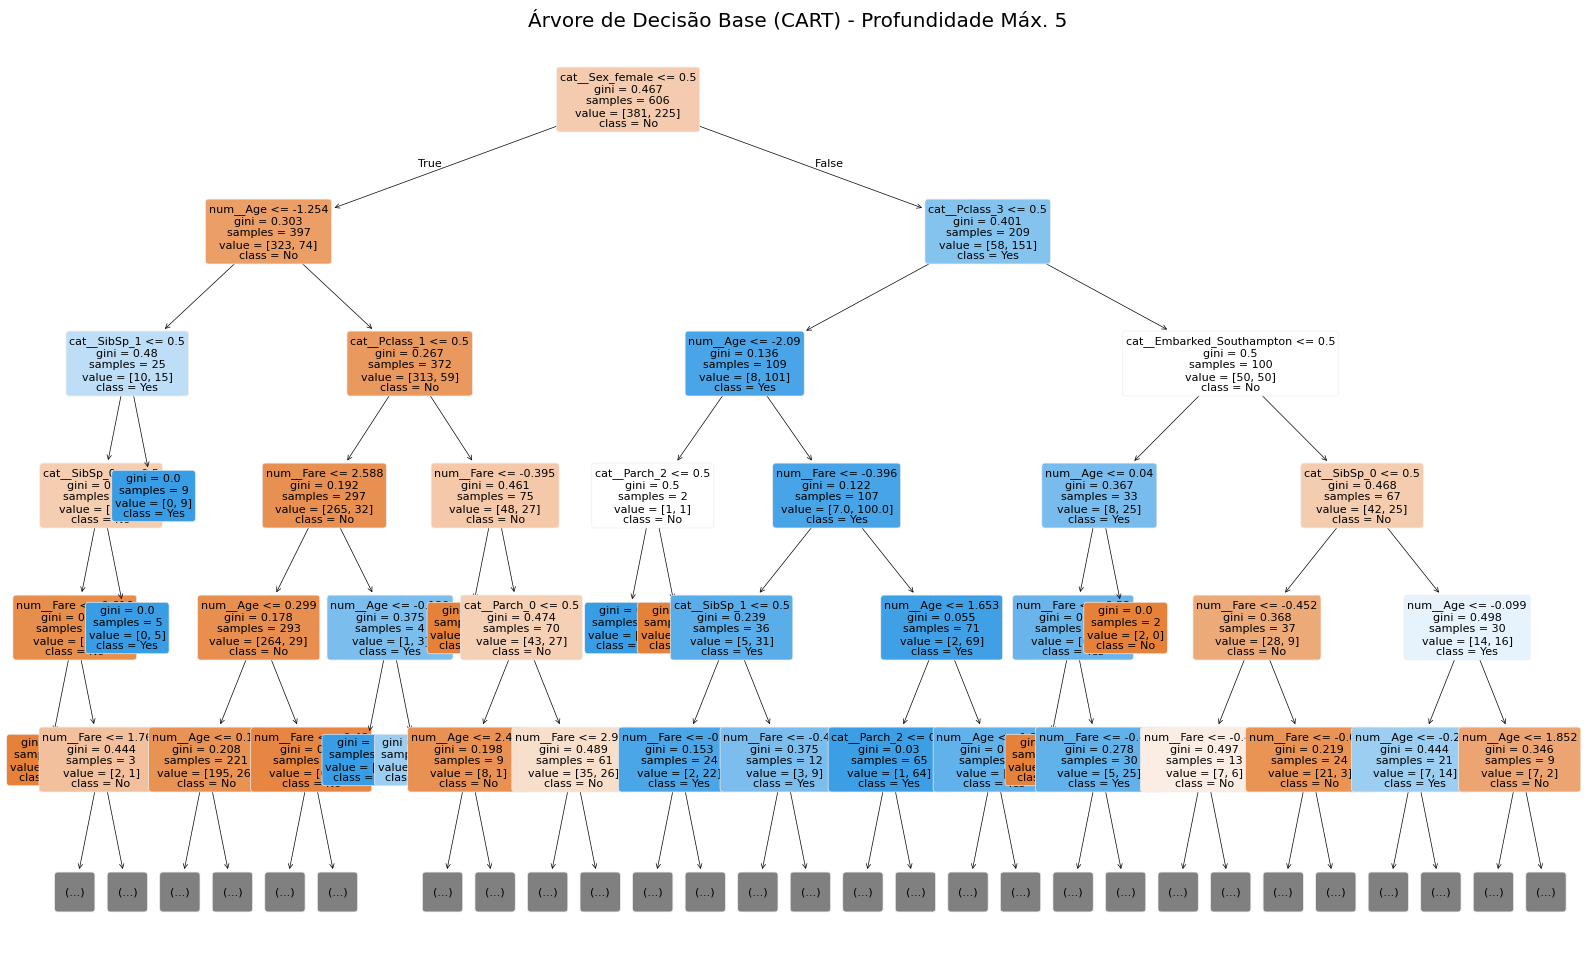


Importância das Variáveis (CART Base):


,Feature,Importance
0,cat__Sex_female,0.291543
1,num__Age,0.251702
2,num__Fare,0.206058
3,cat__Pclass_3,0.077838
4,cat__Embarked_Southampton,0.038462
5,cat__SibSp_0,0.031510
6,cat__Pclass_1,0.028231
7,cat__Parch_0,0.022356
8,cat__SibSp_1,0.020278
9,cat__Embarked_Cherbourg,0.010679



DataFrame de Teste com Previsões (CART Base adicionada):


,Survived_Actual,est_reglog_base,est_cart_base
158,No,No,No
345,Yes,Yes,No
174,No,No,No
427,Yes,Yes,Yes
621,Yes,No,No


In [8]:
# Treinar modelo de Árvore de Decisão (CART)
# R: fitrpart <- rpart(treinamento$Survived ~ ., data = treinamento, method="class")
# criterion='gini' é o padrão para CART
modelo_cart_base = DecisionTreeClassifier(criterion='gini', random_state=seed)
modelo_cart_base.fit(X_treino_proc, y_treino)

print("Modelo de Árvore de Decisão Base (CART) treinado.")

# Fazer previsões no conjunto de teste
# R: rpartpred <- as.factor(predict(fitrpart, teste, type="class"))
previsoes_cart_base = modelo_cart_base.predict(X_teste_proc)

# Avaliar o modelo
# R: CART_tabela <- table(teste$Survived, rpartpred); confusionMatrix(CART_tabela)
print("\n--- Avaliação: Árvore de Decisão Base (CART) ---")
print("\nMatriz de Confusão:")
cm_cart_base = confusion_matrix(y_teste, previsoes_cart_base, labels=modelo_cart_base.classes_)
cm_cart_base_df = pd.DataFrame(cm_cart_base, index=modelo_cart_base.classes_, columns=modelo_cart_base.classes_)
print(cm_cart_base_df)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes_cart_base))

# Adicionar previsões ao DataFrame de teste
# R: teste$estimado <- rpartpred
teste_df_results['est_cart_base'] = previsoes_cart_base

# Plot da Árvore
# R: rpart.plot::prp(fitrpart) ou rpart.plot(fitrpart)
print("\nPlot da Árvore de Decisão (CART Base):")
plt.figure(figsize=(20, 12))
plot_tree(modelo_cart_base,
          filled=True,
          feature_names=feature_names_out,
          class_names=modelo_cart_base.classes_.tolist(), # Converter para lista
          rounded=True,
          fontsize=8,
          max_depth=5) # Limitar profundidade para visualização
plt.title("Árvore de Decisão Base (CART) - Profundidade Máx. 5")
plt.show()

# Importância das variáveis
# R: Importancia <- as.data.frame(fitrpart$variable.importance)
importancias_cart_base = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': modelo_cart_base.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nImportância das Variáveis (CART Base):")
display(importancias_cart_base.head(10))

print("\nDataFrame de Teste com Previsões (CART Base adicionada):")
display(teste_df_results[['Survived_Actual', 'est_reglog_base', 'est_cart_base']].head())

## 8. Otimização de Hiperparâmetros com GridSearchCV (equivalente ao `caret::train`)

Utilizar validação cruzada (CV) e `GridSearchCV` para encontrar os melhores hiperparâmetros para os modelos:
- Árvore de Decisão (CART)
- Árvore de Decisão ('C4.5' - usando critério 'entropy')
- Regressão Logística

*Nota: O R usou `trainControl(method = "CV", number = 5)` e `tuneLength = 10`. Vamos definir um grid de parâmetros explícito para `GridSearchCV`.*

--- Otimizando Árvore de Decisão (CART) ---
Fitting 5 folds for each of 512 candidates, totalling 2560 fits

Melhores Parâmetros (CART): {'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor Acurácia CV (CART): 0.8086


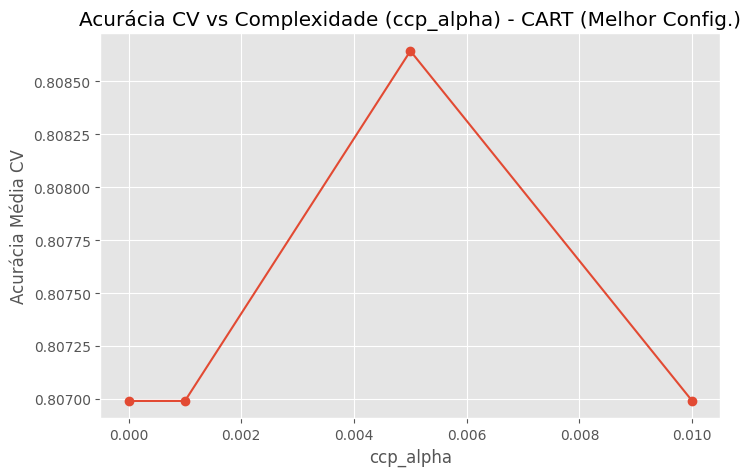


--- Otimizando Árvore de Decisão ('C4.5' via Entropia) ---
Fitting 5 folds for each of 320 candidates, totalling 1600 fits

Melhores Parâmetros ('C4.5'/Entropy): {'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor Acurácia CV ('C4.5'/Entropy): 0.8086

--- Otimizando Regressão Logística ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Melhores Parâmetros (RegLog): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor Acurácia CV (RegLog): 0.7954


In [9]:
# Definir estratégia de validação cruzada (KFold com 5 splits)
# R: trainControl(method = "CV", number = 5)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=seed)

# Dicionário para armazenar os melhores modelos
modelos_otimizados = {}
resultados_cv = {} # Para guardar resultados do grid search

# --- Otimização para CART (equivalente a rpart no caret) ---
print("--- Otimizando Árvore de Decisão (CART) ---")
# R: tuneLength = 10 -> vamos definir um grid
param_grid_cart = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01] # Parâmetro de complexidade (pruning)
}

grid_search_cart = GridSearchCV(
    DecisionTreeClassifier(random_state=seed),
    param_grid_cart,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1, # Usar todos os processadores disponíveis
    verbose=1 # Mostrar progresso
)

grid_search_cart.fit(X_treino_proc, y_treino)

print("\nMelhores Parâmetros (CART):", grid_search_cart.best_params_)
print(f"Melhor Acurácia CV (CART): {grid_search_cart.best_score_:.4f}")
modelos_otimizados['CART_tuned'] = grid_search_cart.best_estimator_
resultados_cv['CART_tuned'] = grid_search_cart.cv_results_

# Plotar Acurácia vs ccp_alpha (exemplo de análise dos resultados CV)
if 'param_ccp_alpha' in grid_search_cart.cv_results_:
    try:
        results_df = pd.DataFrame(grid_search_cart.cv_results_)
        # Filtrar para o melhor criterion, max_depth, etc. para simplificar o plot
        best_non_ccp_params = {k:v for k,v in grid_search_cart.best_params_.items() if k != 'ccp_alpha'}

        plot_data = results_df.copy()
        for param, value in best_non_ccp_params.items():
             plot_data = plot_data[plot_data[f'param_{param}'] == value]

        if not plot_data.empty:
            plt.figure(figsize=(8, 5))
            plt.plot(plot_data['param_ccp_alpha'], plot_data['mean_test_score'], marker='o')
            plt.xlabel("ccp_alpha")
            plt.ylabel("Acurácia Média CV")
            plt.title("Acurácia CV vs Complexidade (ccp_alpha) - CART (Melhor Config.)")
            plt.grid(True)
            plt.show()
        else:
            print("Não foi possível gerar o plot de ccp_alpha (dados filtrados vazios).")

    except Exception as e:
        print(f"Erro ao gerar plot ccp_alpha: {e}")


# --- Otimização para 'C4.5' (usando CART com entropia como aproximação) ---
# R: method = "J48" (WEKA). Scikit-learn não tem J48. Usamos DecisionTreeClassifier(criterion='entropy').
print("\n--- Otimizando Árvore de Decisão ('C4.5' via Entropia) ---")
param_grid_c45 = {
    'criterion': ['entropy'], # Forçar entropia
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01]
}

grid_search_c45 = GridSearchCV(
    DecisionTreeClassifier(random_state=seed),
    param_grid_c45,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_c45.fit(X_treino_proc, y_treino)

print("\nMelhores Parâmetros ('C4.5'/Entropy):", grid_search_c45.best_params_)
print(f"Melhor Acurácia CV ('C4.5'/Entropy): {grid_search_c45.best_score_:.4f}")
modelos_otimizados['C45_tuned'] = grid_search_c45.best_estimator_
resultados_cv['C45_tuned'] = grid_search_c45.cv_results_


# --- Otimização para Regressão Logística (equivalente a glm no caret) ---
print("\n--- Otimizando Regressão Logística ---")
# R: method = "glm"
param_grid_reglog = {
    'penalty': ['l1', 'l2'], # Elastic Net não é suportado por todos os solvers
    'C': [0.01, 0.1, 1, 10, 100], # Inverso da força de regularização
    'solver': ['liblinear', 'saga'] # Solvers que suportam l1/l2
    # 'l1_ratio': [0, 0.5, 1] # Apenas para elasticnet com solver='saga'
}

# Usar um solver que suporte as penalidades escolhidas. 'saga' é versátil mas pode ser lento.
# 'liblinear' é bom para datasets menores e suporta l1 e l2.
grid_search_reglog = GridSearchCV(
    LogisticRegression(random_state=seed, max_iter=2000), # Aumentar max_iter para 'saga' convergir
    param_grid_reglog,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    error_score='raise' # Levanta erro se uma combinação for inválida
)

try:
    grid_search_reglog.fit(X_treino_proc, y_treino)
    print("\nMelhores Parâmetros (RegLog):", grid_search_reglog.best_params_)
    print(f"Melhor Acurácia CV (RegLog): {grid_search_reglog.best_score_:.4f}")
    modelos_otimizados['RegLog_tuned'] = grid_search_reglog.best_estimator_
    resultados_cv['RegLog_tuned'] = grid_search_reglog.cv_results_

except ValueError as e:
    print(f"Erro durante GridSearchCV para RegLog: {e}")
    print("Verifique as combinações de 'penalty' e 'solver'. 'l1' pode não ser suportado por todos os solvers.")
    # Tentar um grid mais simples se o anterior falhar
    param_grid_reglog_simple = {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'] # Solvers comuns para L2
    }
    print("\nTentando com um grid mais simples (apenas L2)...")
    grid_search_reglog = GridSearchCV(
        LogisticRegression(random_state=seed, max_iter=1000),
        param_grid_reglog_simple,
        cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1
    )
    grid_search_reglog.fit(X_treino_proc, y_treino)
    print("\nMelhores Parâmetros (RegLog - Simples):", grid_search_reglog.best_params_)
    print(f"Melhor Acurácia CV (RegLog - Simples): {grid_search_reglog.best_score_:.4f}")
    modelos_otimizados['RegLog_tuned'] = grid_search_reglog.best_estimator_
    resultados_cv['RegLog_tuned'] = grid_search_reglog.cv_results_

## 9. Avaliação dos Modelos Otimizados no Conjunto de Teste

Usar os melhores estimadores encontrados pelo `GridSearchCV` para fazer previsões no conjunto de teste e calcular as métricas finais (matriz de confusão, relatório de classificação).

In [10]:
# Dicionário para armazenar resultados finais no teste
resultados_teste = {}

# Avaliar cada modelo otimizado no conjunto de teste
for nome, modelo in modelos_otimizados.items():
    print(f"\n--- Avaliação no Teste: {nome} ---")
    predicoes_teste = modelo.predict(X_teste_proc)

    # Adicionar predições ao dataframe de resultados
    teste_df_results[f'est_{nome}'] = predicoes_teste

    # Calcular métricas
    accuracy = accuracy_score(y_teste, predicoes_teste)
    cm = confusion_matrix(y_teste, predicoes_teste, labels=modelo.classes_)
    report = classification_report(y_teste, predicoes_teste)

    # Armazenar resultados
    resultados_teste[nome] = {'accuracy': accuracy, 'confusion_matrix': cm, 'report': report}

    # Imprimir resultados
    print(f"Acurácia no Teste: {accuracy:.4f}")
    print("Matriz de Confusão:")
    cm_df = pd.DataFrame(cm, index=modelo.classes_, columns=modelo.classes_)
    print(cm_df)
    print("\nRelatório de Classificação:")
    print(report)

# Incluir resultados dos modelos base para comparação completa
try:
    resultados_teste['RegLog_base'] = {
        'accuracy': accuracy_score(y_teste, teste_df_results['est_reglog_base']),
        'confusion_matrix': cm_reglog_base,
        'report': classification_report(y_teste, teste_df_results['est_reglog_base'])
    }
except KeyError:
    print("Modelo RegLog_base não encontrado nos resultados.") # Segurança

try:
    resultados_teste['CART_base'] = {
        'accuracy': accuracy_score(y_teste, teste_df_results['est_cart_base']),
        'confusion_matrix': cm_cart_base,
        'report': classification_report(y_teste, teste_df_results['est_cart_base'])
    }
except KeyError:
    print("Modelo CART_base não encontrado nos resultados.") # Segurança


print("\nDataFrame de Teste Final com Todas as Predições:")
display(teste_df_results.head())


--- Avaliação no Teste: CART_tuned ---
Acurácia no Teste: 0.8346
Matriz de Confusão:
      No  Yes
No   150   13
Yes   30   67

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.83      0.92      0.87       163
         Yes       0.84      0.69      0.76        97

    accuracy                           0.83       260
   macro avg       0.84      0.81      0.82       260
weighted avg       0.83      0.83      0.83       260


--- Avaliação no Teste: C45_tuned ---
Acurácia no Teste: 0.8346
Matriz de Confusão:
      No  Yes
No   150   13
Yes   30   67

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.83      0.92      0.87       163
         Yes       0.84      0.69      0.76        97

    accuracy                           0.83       260
   macro avg       0.84      0.81      0.82       260
weighted avg       0.83      0.83      0.83       260


--- Avaliação no Teste: RegLog_t

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Actual,est_reglog_base,est_cart_base,est_CART_tuned,est_C45_tuned,est_RegLog_tuned
158,3,male,28.0,0,0,86.625,Southampton,No,No,No,No,No,No
345,2,female,24.0,0,0,13.000,Southampton,Yes,Yes,No,Yes,Yes,Yes
174,1,male,56.0,0,0,306.958,Cherbourg,No,No,No,No,No,No
427,2,female,19.0,0,0,26.000,Southampton,Yes,Yes,Yes,Yes,Yes,Yes
621,1,male,42.0,1,0,525.542,Southampton,Yes,No,No,No,No,No


## 10. Comparação Visual dos Modelos (Acurácia no Teste)

Comparar a performance (acurácia) de todos os modelos treinados (base e otimizados) no conjunto de teste. Equivalente ao `bwplot(resamples(...))` do R, mas usando a performance final no teste.

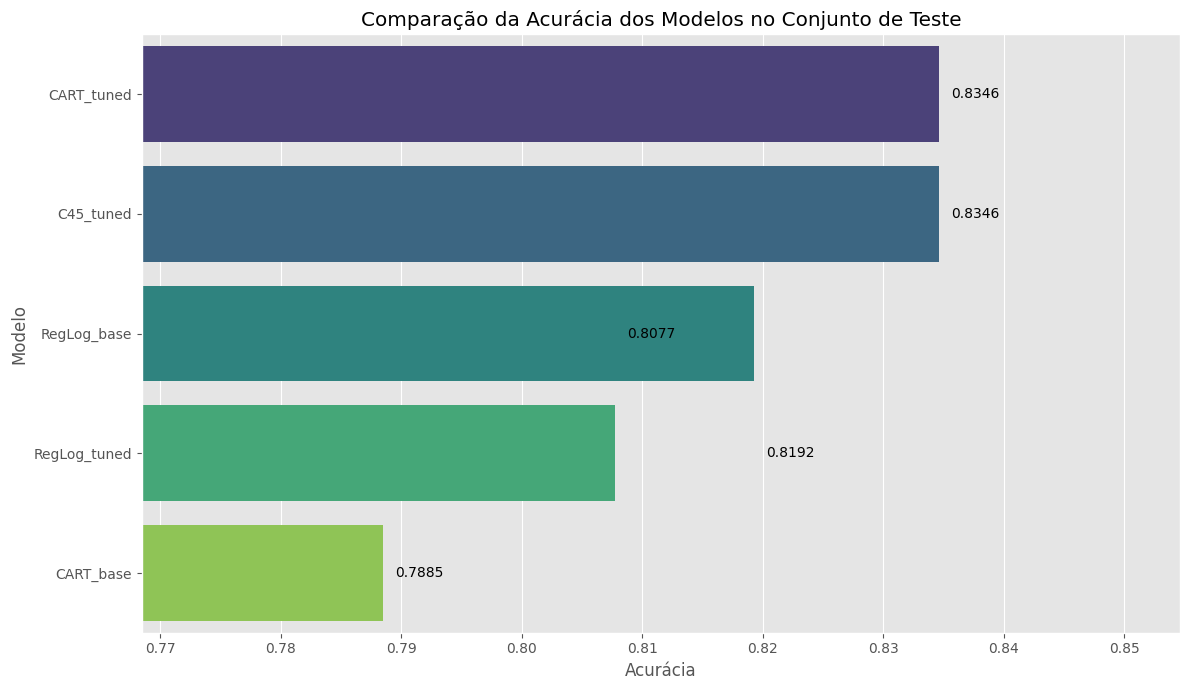


Tabela de Acurácias (Teste):


,Modelo,Acurácia
0,CART_tuned,0.834615
1,C45_tuned,0.834615
2,RegLog_base,0.819231
3,RegLog_tuned,0.807692
4,CART_base,0.788462


In [11]:
# Coletar acurácias dos resultados no teste
acuracias_teste = {nome: res['accuracy'] for nome, res in resultados_teste.items()}

# Criar DataFrame para plotagem
acuracias_df = pd.DataFrame(list(acuracias_teste.items()), columns=['Modelo', 'Acurácia'])
acuracias_df = acuracias_df.sort_values(by='Acurácia', ascending=False)

# Plotar Barplot comparando as acurácias
plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=acuracias_df, palette='viridis', hue='Modelo', dodge=False, legend=False)
plt.title('Comparação da Acurácia dos Modelos no Conjunto de Teste')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
# Adicionar texto com valores nas barras
for index, row in acuracias_df.iterrows():
    plt.text(row['Acurácia'] + 0.001, index, f"{row['Acurácia']:.4f}", color='black', va='center')

plt.xlim(min(acuracias_df['Acurácia']) - 0.02, max(acuracias_df['Acurácia']) + 0.02) # Ajustar limites
plt.tight_layout()
plt.show()

print("\nTabela de Acurácias (Teste):")
display(acuracias_df.reset_index(drop=True))

# Opcional: Comparar outras métricas como F1-score
f1_scores = {nome: classification_report(y_teste, teste_df_results[f'est_{nome}'], output_dict=True)['weighted avg']['f1-score']
             for nome in modelos_otimizados.keys()} # Adicionar modelos base se necessário
# ... (código para plotar F1-score similar ao de acurácia) ...

## 11. Visualização das Melhores Árvores Otimizadas

Plotar as árvores de decisão otimizadas (CART e 'C4.5'/Entropy) encontradas pelo `GridSearchCV`.


--- Plotando Árvore CART Otimizada ---


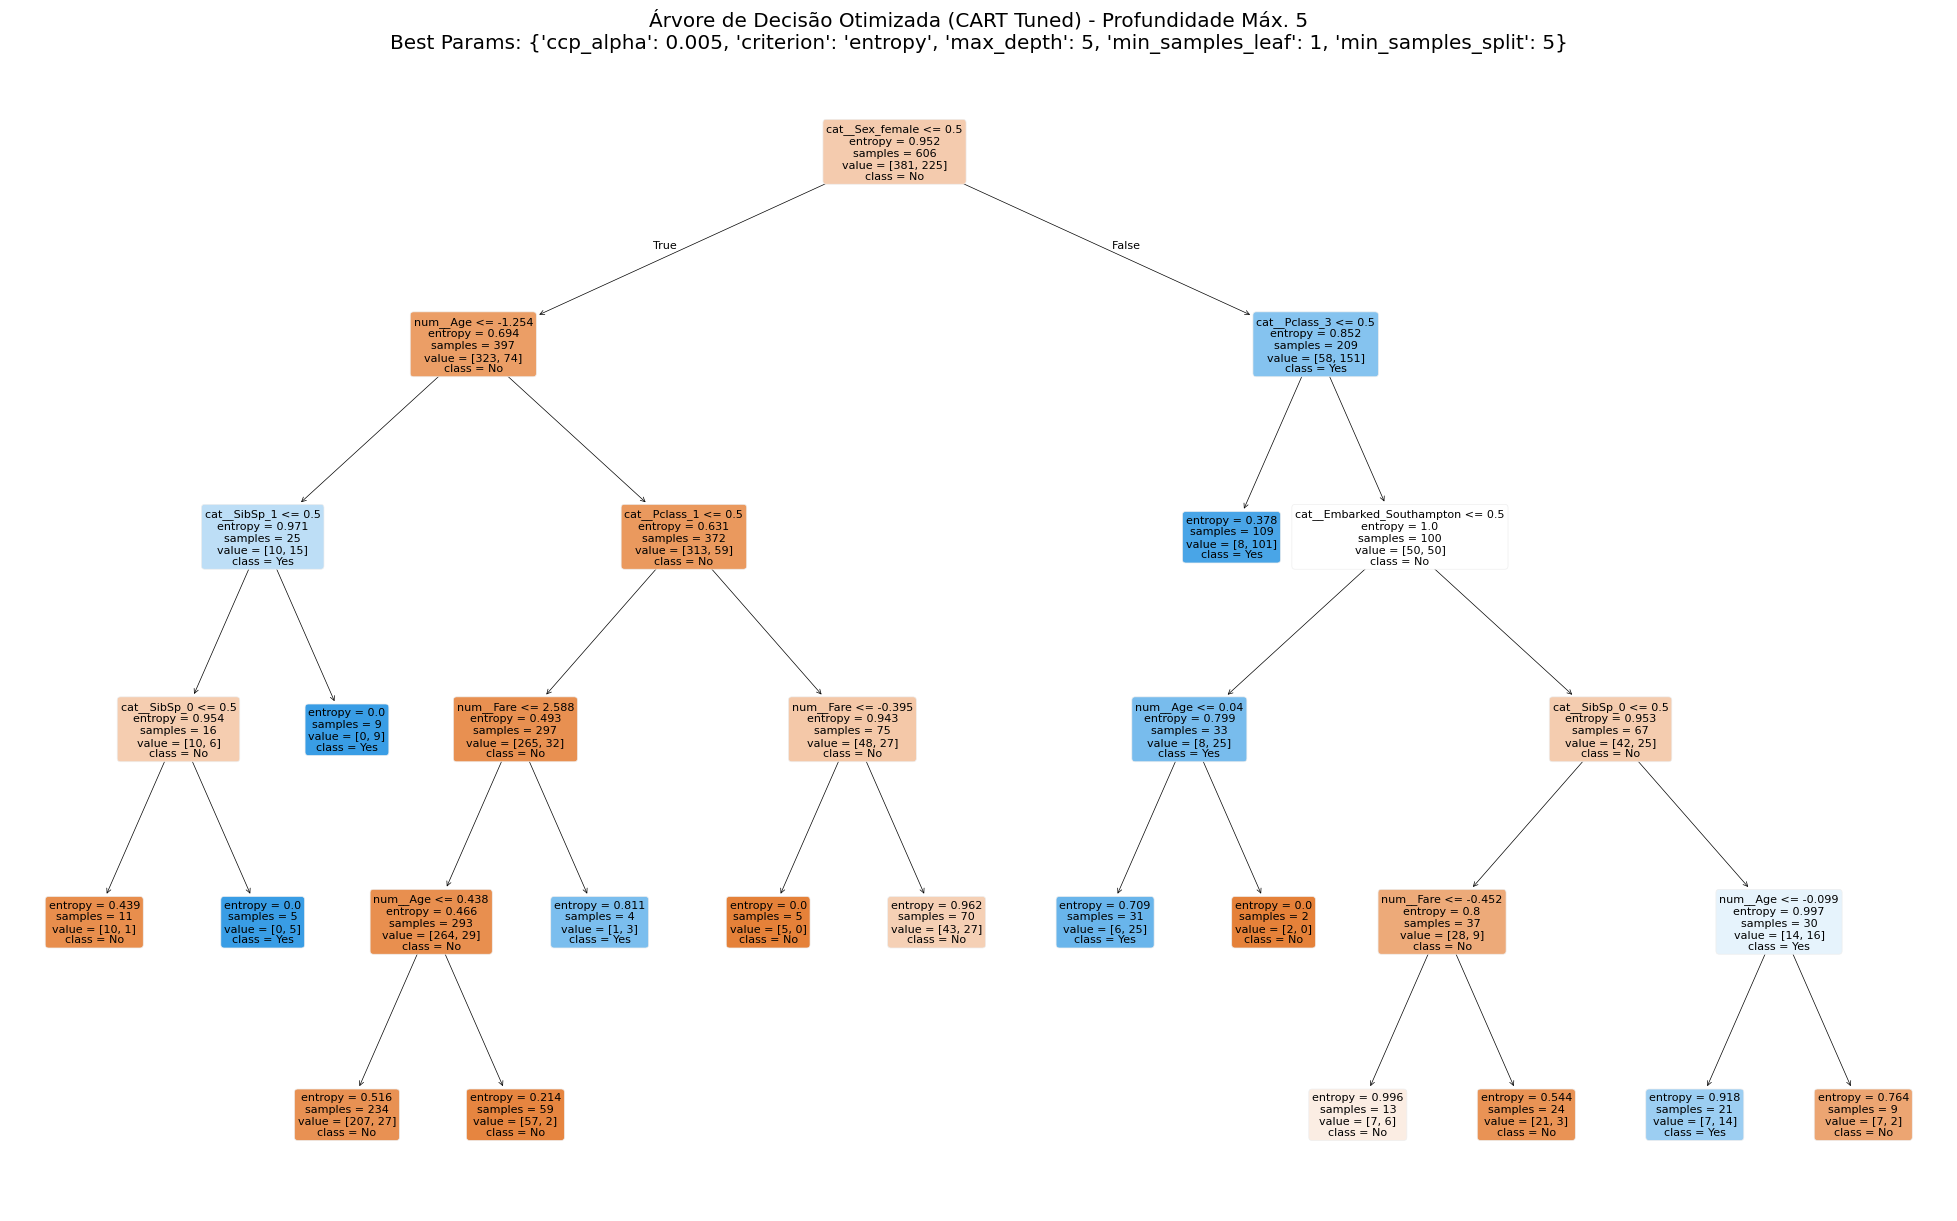


--- Plotando Árvore 'C4.5'/Entropy Otimizada ---


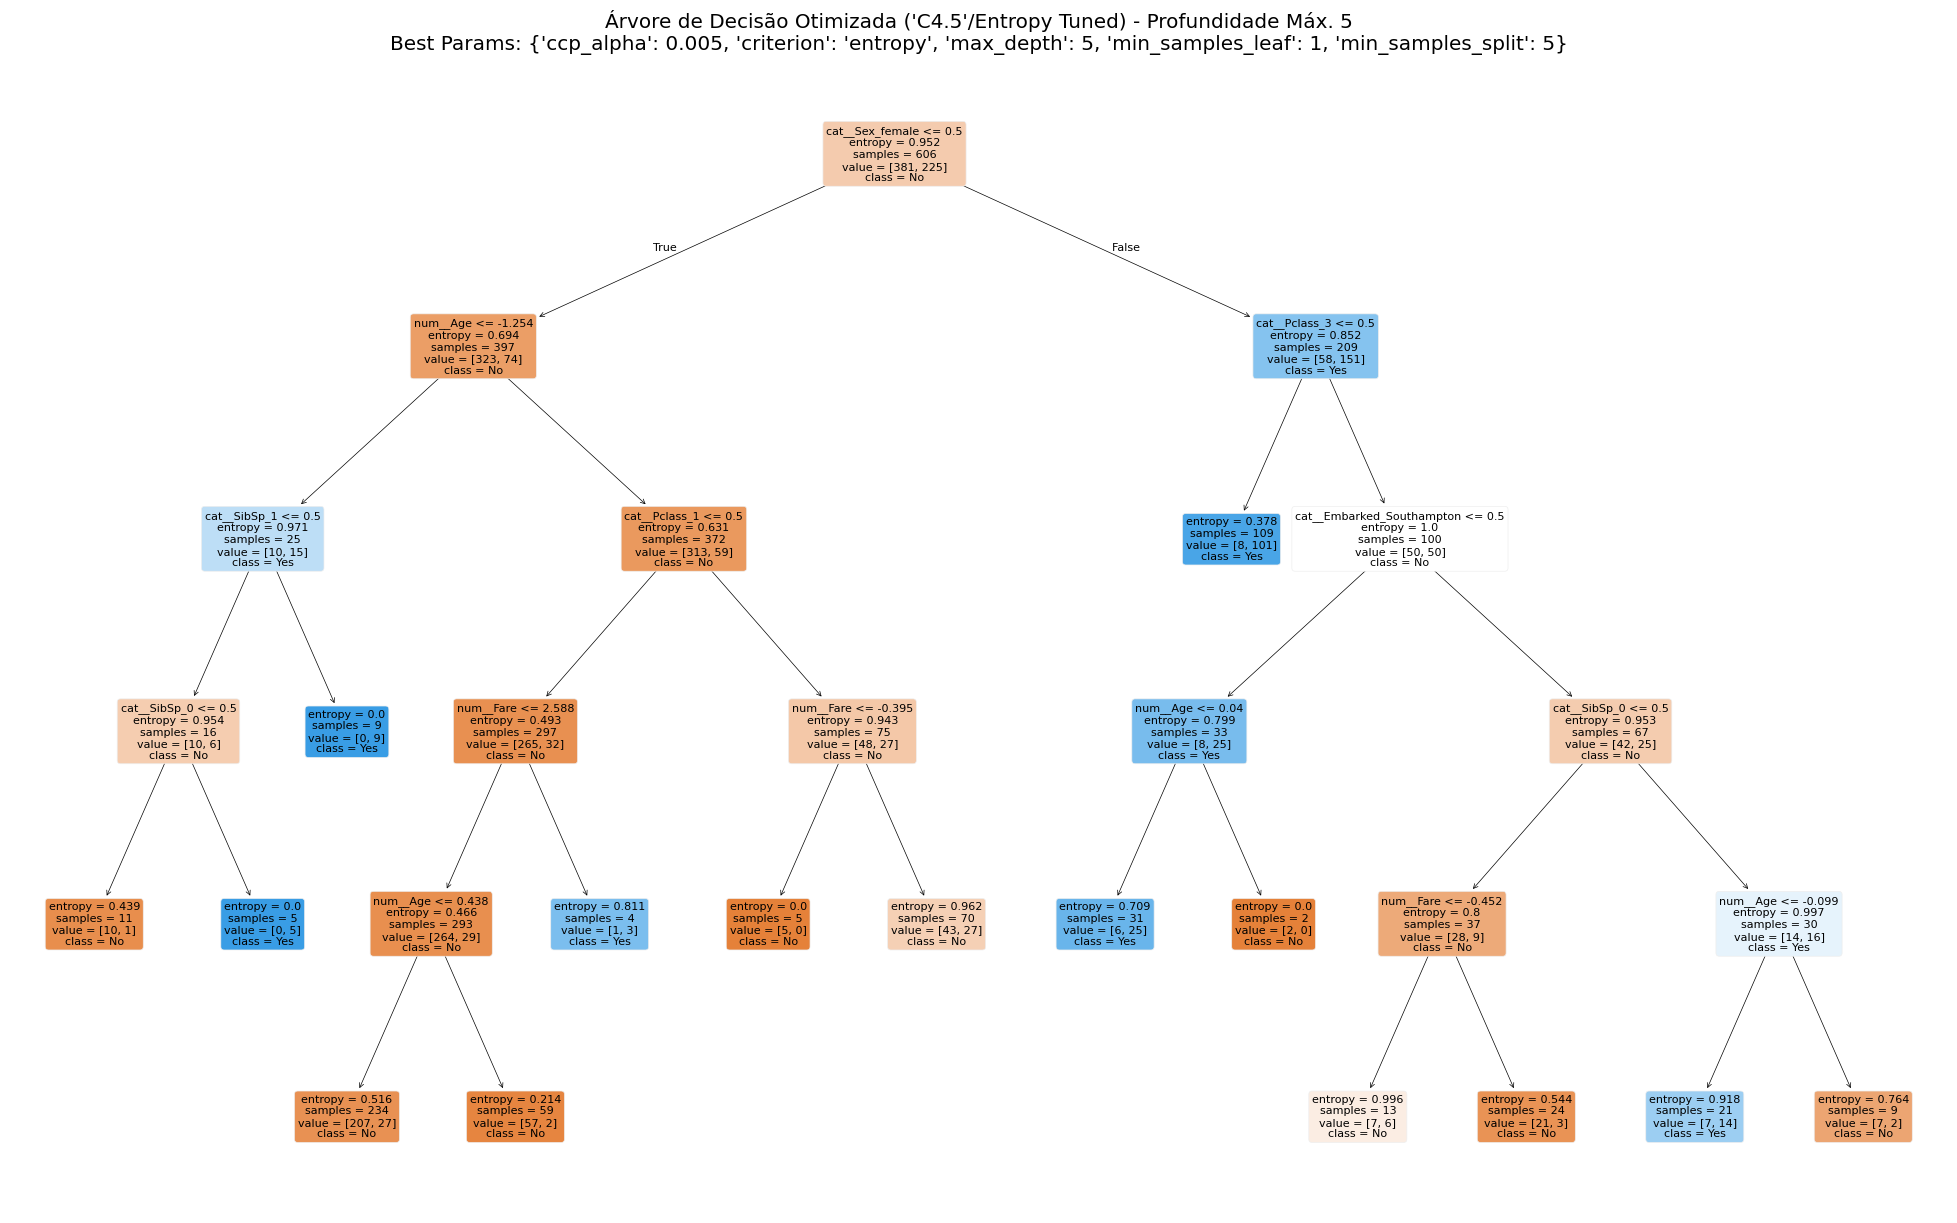

In [12]:
# Plot da Árvore CART Otimizada
if 'CART_tuned' in modelos_otimizados:
    print("\n--- Plotando Árvore CART Otimizada ---")
    modelo_plot = modelos_otimizados['CART_tuned']
    plt.figure(figsize=(25, 15)) # Ajustar tamanho conforme necessário
    plot_tree(modelo_plot,
              filled=True,
              feature_names=feature_names_out,
              class_names=modelo_plot.classes_.tolist(),
              rounded=True,
              fontsize=8,
              max_depth=5) # Limitar profundidade para visualização
    plt.title(f"Árvore de Decisão Otimizada (CART Tuned) - Profundidade Máx. 5\nBest Params: {grid_search_cart.best_params_}")
    plt.show()
else:
    print("Modelo CART_tuned não encontrado para plot.")


# Plot da Árvore 'C4.5'/Entropy Otimizada
if 'C45_tuned' in modelos_otimizados:
    print("\n--- Plotando Árvore 'C4.5'/Entropy Otimizada ---")
    modelo_plot = modelos_otimizados['C45_tuned']
    plt.figure(figsize=(25, 15))
    plot_tree(modelo_plot,
              filled=True,
              feature_names=feature_names_out,
              class_names=modelo_plot.classes_.tolist(),
              rounded=True,
              fontsize=8,
              max_depth=5) # Limitar profundidade
    plt.title(f"Árvore de Decisão Otimizada ('C4.5'/Entropy Tuned) - Profundidade Máx. 5\nBest Params: {grid_search_c45.best_params_}")
    plt.show()
else:
    print("Modelo C45_tuned não encontrado para plot.")

## 12. Salvar Resultados (Opcional)

Salvar o dataframe de teste contendo os dados originais, a classe real e as previsões de todos os modelos. Equivalente ao `write.csv(...)` no R.

In [13]:
# Salvar o dataframe de teste com todas as predições
# R: write.csv(teste, "D:/.../teste_secitec_aula.csv")
output_filename = "titanic_teste_predicoes_python.csv"
try:
    # Selecionar colunas relevantes para salvar
    cols_to_save = ['Survived_Actual'] + [col for col in teste_df_results.columns if col.startswith('est_')]
    # Juntar com as features originais do teste, se desejado
    results_to_save = pd.concat([X_teste, teste_df_results[cols_to_save]], axis=1)

    results_to_save.to_csv(output_filename, index=True, index_label='OriginalIndex', sep=',', decimal='.') # Usar vírgula como separador padrão CSV
    print(f"\nDataFrame de teste com predições salvo em: {output_filename}")
    display(results_to_save.head())
except Exception as e:
    print(f"\nErro ao salvar o arquivo CSV: {e}")
    # Considerar salvar em outro local ou verificar permissões


DataFrame de teste com predições salvo em: titanic_teste_predicoes_python.csv


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Actual,est_reglog_base,est_cart_base,est_CART_tuned,est_C45_tuned,est_RegLog_tuned
158,3,male,28.0,0,0,86.625,Southampton,No,No,No,No,No,No
345,2,female,24.0,0,0,13.000,Southampton,Yes,Yes,No,Yes,Yes,Yes
174,1,male,56.0,0,0,306.958,Cherbourg,No,No,No,No,No,No
427,2,female,19.0,0,0,26.000,Southampton,Yes,Yes,Yes,Yes,Yes,Yes
621,1,male,42.0,1,0,525.542,Southampton,Yes,No,No,No,No,No
